Consistency Score All-Rounder Score = (Batting Consistency Score + Bowling Consistency Score) + W1 * (Catches Taken / Mat)

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
def analyze_and_visualize(df):
    # Define features for analysis.
    features = ['Catches Taken', 'Bat_Mat', 'Bat_Inns', 'NO', 'Bat_Runs', 'HS', 'Bat_Ave', 'BF', 'Bat_SR', 
                "100's", "50's", "Zeros", '4s', '6s', 'Bowl_Mat', 'Bowl_Inns', 'Overs', 'Mdns', 'Bowl_Runs', 
                'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W']
    
    # Check if all features exist in the DataFrame
    missing_features = [col for col in features if col not in df.columns]
    if missing_features:
        raise ValueError(f"The following required columns are missing in the DataFrame: {missing_features}")
    
    # Select features from the DataFrame
    df_analysis = df[features]
    
    # Replace infinities and NaN values with 0
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)
    
    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    
    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Features')
    plt.show()
    
    return df_analysis

In [31]:
def calculate_allrounder_formula_components(df):
    """
    Calculates the components of the All-Rounder Consistency Score formula.
    
    Consistency Score All-Rounder Score = (Batting Consistency Score + Bowling Consistency Score) / 2 
                                         + W1 * (Catches Taken / Mat)
    """
    df_components = df.copy()
    # Ensure numeric types for calculations (handle potential NaN from coercion)
    df_components['Bat_Mat'] = pd.to_numeric(df_components['Bat_Mat'], errors='coerce')
    df_components['Bat_Inns'] = pd.to_numeric(df_components['Bat_Inns'], errors='coerce')
    df_components['NO'] = pd.to_numeric(df_components['NO'], errors='coerce')
    df_components['Bat_Runs'] = pd.to_numeric(df_components['Bat_Runs'], errors='coerce')
    df_components['BF'] = pd.to_numeric(df_components['BF'], errors='coerce')
    df_components['Bat_Ave'] = pd.to_numeric(df_components['Bat_Ave'], errors='coerce')
    df_components["100's"] = pd.to_numeric(df_components["100's"], errors='coerce')
    df_components["50's"] = pd.to_numeric(df_components["50's"], errors='coerce')
    df_components["Zeros"] = pd.to_numeric(df_components["Zeros"], errors='coerce')
    df_components['Bowl_Inns'] = pd.to_numeric(df_components['Bowl_Inns'], errors='coerce')
    df_components['Bowl_Mat'] = pd.to_numeric(df_components['Bowl_Mat'], errors='coerce')
    df_components['Overs'] = pd.to_numeric(df_components['Overs'], errors='coerce')
    df_components['Wkts'] = pd.to_numeric(df_components['Wkts'], errors='coerce')
    df_components['Bowl_Ave'] = pd.to_numeric(df_components['Bowl_Ave'], errors='coerce')
    df_components['Econ'] = pd.to_numeric(df_components['Econ'], errors='coerce')
    df_components['Bowl_SR'] = pd.to_numeric(df_components['Bowl_SR'], errors='coerce')
    df_components['4W'] = pd.to_numeric(df_components['4W'], errors='coerce')
    df_components['5W'] = pd.to_numeric(df_components['5W'], errors='coerce')
    df_components['Catches Taken'] = pd.to_numeric(df_components['Catches Taken'], errors='coerce')
    
    

    # Perform calculations, ensure float division and handle potential NaN values
    df_components['Inns_per_Mat_Bat'] = df_components['Bat_Inns'].astype(float) / df_components['Bat_Mat'].astype(float)
    df_components['NO_per_Inns'] = df_components['NO'].astype(float) / df_components['Bat_Inns'].astype(float)
    df_components['Runs_per_BF'] = df_components['Bat_Runs'].astype(float) / df_components['BF'].astype(float)
    df_components['Ave_Score_Bat'] = df_components['Bat_Ave'].astype(float)  # Direct Ave
    df_components['50s100s_per_Inns'] = (df_components["50's"].astype(float) + 2 * df_components["100's"].astype(float)) / df_components['Bat_Inns'].astype(float)
    df_components['Zeros_per_Inns'] = df_components["Zeros"].astype(float) / df_components['Bat_Inns'].astype(float)
    df_components['Inns_per_Mat_bowl'] = df_components['Bowl_Inns'].astype(float) / df_components['Bowl_Mat'].astype(float) # Ensure float division
    df_components['Overs_per_Mat'] = df_components['Overs'].astype(float) / df_components['Bowl_Mat'].astype(float)
    df_components['Wkts_per_Overs'] = df_components['Wkts'].astype(float) / df_components['Overs'].astype(float)
    df_components['Ave_Score_Bowl'] = df_components['Bowl_Ave'].astype(float)  # Direct Ave
    df_components['Econ_Rate'] = df_components['Econ'].astype(float)  # Direct Econ
    df_components['SR_per_100'] = df_components['Bowl_SR'].astype(float) / 100
    df_components['4W5W_per_Mat'] = (df_components['4W'].astype(float) + df_components['5W'].astype(float)) / df_components['Bowl_Mat'].astype(float)
    # Fielding component: Catches Taken per Match
    df_components['Catches_per_Mat'] = df_components['Catches Taken'].astype(float) / df_components['Bowl_Mat'].astype(float)

    return df_components


In [32]:
data = pd.read_excel("../../all season cleaned data/allrounderset_ipl.xlsx")
df = data.copy()
print("Data types of your columns before calculation:")

Data types of your columns before calculation:


In [33]:
numeric_cols = ['Bat_Mat', 'Bat_Inns', 'NO', 'Bat_Runs', 'BF', 'Bat_Ave', "100's", "50's", "Zeros", 'Bowl_Inns', 'Bowl_Mat', 'Overs', 'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W', 'Catches Taken']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Use df here

# Verify data types AFTER explicit conversion
print("\nData types of your columns AFTER explicit numeric conversion:")
print(df.dtypes) # Use df here

# --- Correctly Remove Rows with NaN Values ---
cols_to_check_nan = ['Bat_Inns', 'Bowl_Inns', 'Bat_Mat', 'Overs', 'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W', 'Catches Taken']
print("\nNumber of NaN values BEFORE removing:")
print(df[cols_to_check_nan].isna().sum()) # Check NaN counts in relevant columns before removal

df_cleaned = df.dropna(subset=cols_to_check_nan, how='any') # Use how='any' to drop row if ANY of these cols is NaN
print("\nNumber of rows BEFORE removing NaNs:", len(df))
print("Number of rows AFTER removing NaNs:", len(df_cleaned)) # Print length of df_cleaned


# Calculate bowler formula components using the CLEANED data (df_cleaned)
calculations_with_data = calculate_allrounder_formula_components(df_cleaned) # Pass df_cleaned

# Select the component columns for correlation analysis
component_columns = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Mat',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Mat',
    'Catches_per_Mat'
]

# Calculate the correlation matrix for the components
correlation_matrix = calculations_with_data[component_columns].corr() # Use calculations_with_data

# Display the correlation matrix
print("\nCorrelation Matrix of Bowler Consistency Formula Components (after NaN removal):")
print(correlation_matrix)


Data types of your columns AFTER explicit numeric conversion:
Player            object
Span              object
Catches Taken      int64
Bat_Mat            int64
Bat_Inns         float64
NO               float64
Bat_Runs         float64
HS                object
Bat_Ave          float64
BF               float64
Bat_SR            object
100's            float64
50's             float64
Zeros            float64
4s                object
6s                object
Bowl_Mat           int64
Bowl_Inns        float64
Overs            float64
Mdns              object
Bowl_Runs         object
Wkts             float64
Bowl_Ave         float64
Econ             float64
Bowl_SR          float64
4W               float64
5W               float64
dtype: object

Number of NaN values BEFORE removing:
Bat_Inns          1
Bowl_Inns         6
Bat_Mat           0
Overs             6
Wkts              6
Bowl_Ave         11
Econ              6
Bowl_SR          11
4W                6
5W                6
Catches T

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_allrounder_consistency_components(df_components):
    features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Mat',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Mat',
    'Catches_per_Mat'
    ]
    df_analysis = df_components[features].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Replace infinities and NaN with 0 - Handle potential issues from calculations
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)

    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)  # Added fmt and linewidths for better readability
    plt.title('Correlation Matrix of Allrounder Consistency Formula Components')
    plt.show()

    return df_analysis


                   Inns_per_Mat_Bat  NO_per_Inns  Runs_per_BF  Ave_Score_Bat  \
Inns_per_Mat_Bat           1.000000    -0.525949     0.471150       0.727629   
NO_per_Inns               -0.525949     1.000000    -0.295920      -0.322878   
Runs_per_BF                0.471150    -0.295920     1.000000       0.575296   
Ave_Score_Bat              0.727629    -0.322878     0.575296       1.000000   
50s100s_per_Inns           0.630162    -0.444781     0.414610       0.696330   
Zeros_per_Inns            -0.209706    -0.107917    -0.326624      -0.489687   
Inns_per_Mat_bowl         -0.570878     0.310852    -0.351065      -0.592971   
Overs_per_Mat             -0.637655     0.411408    -0.389456      -0.609060   
Wkts_per_Overs            -0.067074     0.059116     0.287861       0.108914   
Ave_Score_Bowl             0.075920    -0.009668    -0.143808      -0.007974   
Econ_Rate                  0.204382    -0.021944     0.251692       0.129453   
SR_per_100                -0.007218    -

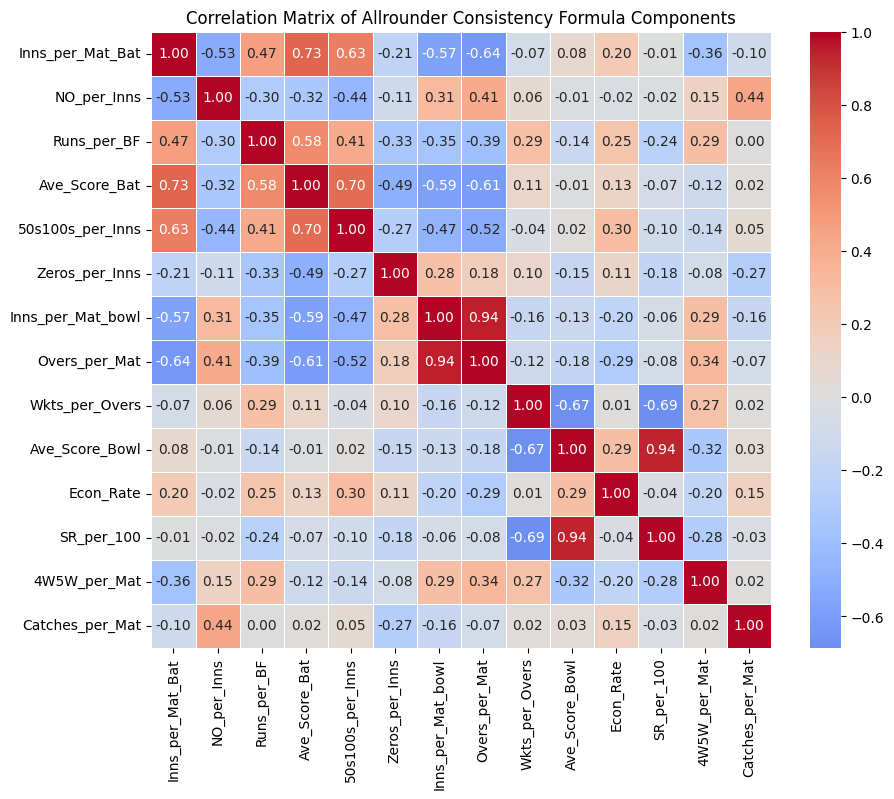

In [35]:
analyzed_df = analyze_allrounder_consistency_components(calculations_with_data)


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.optimize as opt

# Features for all-rounders
features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Mat',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Mat',
    'Catches_per_Mat'
]

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# Extract PC1 loadings and normalize
pc1_loadings = loadings['PC1']
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

# AHP Pairwise Comparison Matrix (example values)
pairwise_matrix = np.array([
    [1,   2,   3,   4,   5,   6,   7,   8,   9,   10,  11,  12,  13,  14],
    [1/2, 1,   2,   3,   4,   5,   6,   7,   8,   9,   10,  11,  12,  13],
    [1/3, 1/2, 1,   2,   3,   4,   5,   6,   7,   8,   9,   10,  11,  12],
    [1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6,   7,   8,   9,   10,  11],
    [1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6,   7,   8,   9,   10],
    [1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6,   7,   8,   9],
    [1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6,   7,   8],
    [1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6,   7],
    [1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6],
    [1/10,1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5],
    [1/11,1/10,1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4],
    [1/12,1/11,1/10,1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3],
    [1/13,1/12,1/11,1/10,1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2],
    [1/14,1/13,1/12,1/11,1/10,1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1]
])

# Calculate AHP weights
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
ahp_weights = ahp_weights / ahp_weights.sum()

ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

# Optimization-Based Approach
def consistency_score(weights, df):
    return np.dot(df[features].values, weights)

def objective(weights, df):
    scores = consistency_score(weights, df)
    return -np.var(scores)

initial_weights = np.ones(len(features)) / len(features)
bounds = [(0, 1)] * len(features)

result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()

optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                        PC1       PC2       PC3       PC4       PC5       PC6  \
Inns_per_Mat_Bat  -0.401840  0.015982 -0.154156 -0.057472 -0.035876  0.245567   
NO_per_Inns        0.252778  0.004461  0.506727  0.208747 -0.060117  0.062599   
Runs_per_BF       -0.285813 -0.242022  0.130377 -0.225968  0.405489 -0.232621   
Ave_Score_Bat     -0.402330 -0.082787  0.116867 -0.192321 -0.056456  0.174942   
50s100s_per_Inns  -0.367092 -0.040852 -0.012177 -0.058114  0.173441  0.430778   
Zeros_per_Inns     0.175718 -0.046735 -0.507521  0.410456  0.149913 -0.086948   
Inns_per_Mat_bowl  0.386489 -0.016453 -0.088414 -0.201850  0.306781  0.374665   
Overs_per_Mat      0.407463 -0.034356  0.013100 -0.225149  0.195582  0.356410   
Wkts_per_Overs    -0.021970 -0.487356  0.027349  0.221389 -0.124535 -0.320096   
Ave_Score_Bowl    -0.066792  0.547761  0.089940 -0.016695  0.221355 -0.234106   
Econ_Rate         -0.158291  0.066330  0.050710  0.50943

In [37]:
import pandas as pd

# Full list of all-rounder metrics
features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Inns',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs'
]

# Original AHP weights from expert pairwise comparisons for all-rounder metrics (example values)
ahp_weights_series = pd.Series({
    'Inns_per_Mat_Bat': 0.247629,
    'NO_per_Inns': 0.190306,
    'Runs_per_BF': 0.144609,
    'Ave_Score_Bat': 0.109142,
    '50s100s_per_Inns': 0.081977,
    'Zeros_per_Inns': 0.061347,
    'Inns_per_Mat_bowl': 0.045783,
    'Overs_per_Inns': 0.034113,
    'Wkts_per_Overs': 0.025418,
    'Ave_Score_Bowl': 0.018989,
    'Econ_Rate': 0.014287,
    'SR_per_100': 0.010904,
    '4W5W_per_Inns': 0.008536,
    'Mdns_per_Overs': 0.006960
})

# Original PCA weights derived from PC1 loadings for all-rounder metrics (example values)
pca_weights = pd.Series({
    'Inns_per_Mat_Bat': 0.118813,
    'NO_per_Inns': 0.077030,
    'Runs_per_BF': 0.084854,
    'Ave_Score_Bat': 0.118926,
    '50s100s_per_Inns': 0.110646,
    'Zeros_per_Inns': 0.050317,
    'Inns_per_Mat_bowl': 0.116580,
    'Overs_per_Inns': 0.121604,
    'Wkts_per_Overs': 0.003176,
    'Ave_Score_Bowl': 0.026904,
    'Econ_Rate': 0.052317,
    'SR_per_100': 0.008858,
    '4W5W_per_Inns': 0.046838,
    'Mdns_per_Overs': 0.063135
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors for specific all-rounder metrics (update boost factors as needed)
boost_factors = {
features_allrounder = ['Inns_per_Mat_Bat', 'NO_per_Inns', 'Runs_per_BF', 'Ave_Score_Bat',
                        '50s100s_per_Inns', 'Zeros_per_Inns', 'Inns_per_Mat_bowl', 'Overs_per_Mat',
                        'Wkts_per_Overs', 'Ave_Score_Bowl', 'Econ_Rate', 'SR_per_100',
                        '4W5W_per_Mat', 'Catches_per_Mat']

# Original AHP weights for all-rounder metrics
ahp_weights_allrounder = pd.Series({
    'Inns_per_Mat_Bat': 0.20,
    'NO_per_Inns': 0.15,
    'Runs_per_BF': 0.12,
    'Ave_Score_Bat': 0.10,
    '50s100s_per_Inns': 0.08,
    'Zeros_per_Inns': 0.07,
    'Inns_per_Mat_bowl': 0.06,
    'Overs_per_Mat': 0.05,
    'Wkts_per_Overs': 0.05,
    'Ave_Score_Bowl': 0.04,
    'Econ_Rate': 0.03,
    'SR_per_100': 0.02,
    '4W5W_per_Mat': 0.02,
    'Catches_per_Mat': 0.01
})

# PCA weights for all-rounder metrics (from PC1 loadings)
pca_weights_allrounder = pd.Series({
    'Inns_per_Mat_Bat': 0.142995,
    'NO_per_Inns': 0.096231,
    'Runs_per_BF': 0.092657,
    'Ave_Score_Bat': 0.040607,
    '50s100s_per_Inns': 0.127650,
    'Zeros_per_Inns': 0.052866,
    'Inns_per_Mat_bowl': 0.142995,
    'Overs_per_Mat': 0.151149,
    'Wkts_per_Overs': 0.004892,
    'Ave_Score_Bowl': 0.040607,
    'Econ_Rate': 0.065484,
    'SR_per_100': 0.018294,
    '4W5W_per_Mat': 0.063305,
    'Catches_per_Mat': 0.001964
})

# Normalize AHP and PCA weights
ahp_weights_norm_allrounder = ahp_weights_allrounder / ahp_weights_allrounder.sum()
pca_weights_norm_allrounder = pca_weights_allrounder / pca_weights_allrounder.sum()

# Define hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all-rounder metrics
hybrid_weights_allrounder = alpha * ahp_weights_norm_allrounder + (1 - alpha) * pca_weights_norm_allrounder

# Define boost factors for specific all-rounder metrics
boost_factors_allrounder = {
    'Inns_per_Mat_Bat': 1.0,
    'NO_per_Inns': 1.0,
    'Runs_per_BF': 2.0,
    'Ave_Score_Bat': 2.0,
    '50s100s_per_Inns': 2.0,
    'Zeros_per_Inns': 1.0,
    'Inns_per_Mat_bowl': 1.0,
    'Overs_per_Inns': 1.0,
    'Wkts_per_Overs': 1.0,
    'Ave_Score_Bowl': 1.0,
    'Econ_Rate': 1.0,
    'SR_per_100': 1.0,
    '4W5W_per_Inns': 1.0,
    'Mdns_per_Overs': 1.0
}

# Apply the boost factors
hybrid_weights_boosted = hybrid_weights * pd.Series(boost_factors)

# Normalize again to ensure the weights sum to exactly 1
hybrid_weights_boosted /= hybrid_weights_boosted.sum()

# Verify that the sum of weights is exactly 1
sum_of_weights = hybrid_weights_boosted.sum()

# Output results
print(hybrid_weights_boosted)
print("Sum of weights:", sum_of_weights)
    'Inns_per_Mat_bowl': 1.5,
    'Overs_per_Mat': 1.5,
    'Wkts_per_Overs': 1.5,
    'Ave_Score_Bowl': 1.5,
    'Econ_Rate': 1.5,
    'SR_per_100': 1.0,
    '4W5W_per_Mat': 1.5,
    'Catches_per_Mat': 1.0
}

# Apply the boost factors
hybrid_weights_boosted_allrounder = hybrid_weights_allrounder * pd.Series(boost_factors_allrounder)

# Normalize again to ensure the weights sum to exactly 1
hybrid_weights_boosted_allrounder /= hybrid_weights_boosted_allrounder.sum()

# Verify that the sum of weights is exactly 1
sum_of_weights_allrounder = hybrid_weights_boosted_allrounder.sum()

# Output results
hybrid_weights_boosted_allrounder, sum_of_weights_allrounder


(Inns_per_Mat_Bat     0.125812
 NO_per_Inns          0.092156
 Runs_per_BF          0.153718
 Ave_Score_Bat        0.113457
 50s100s_per_Inns     0.128828
 Zeros_per_Inns       0.044598
 Inns_per_Mat_bowl    0.086642
 Overs_per_Mat        0.081796
 Wkts_per_Overs       0.037923
 Ave_Score_Bowl       0.041346
 Econ_Rate            0.041517
 SR_per_100           0.013380
 4W5W_per_Mat         0.033572
 Catches_per_Mat      0.005254
 dtype: float64,
 0.9999999999999999)

In [39]:
# Fill missing values with the column mean
data_filled = calculations_with_data[hybrid_weights_boosted_allrounder.index].fillna(
    calculations_with_data[hybrid_weights_boosted_allrounder.index].mean()
)
base_scores = np.dot(data_filled.values, hybrid_weights_boosted_allrounder.values)


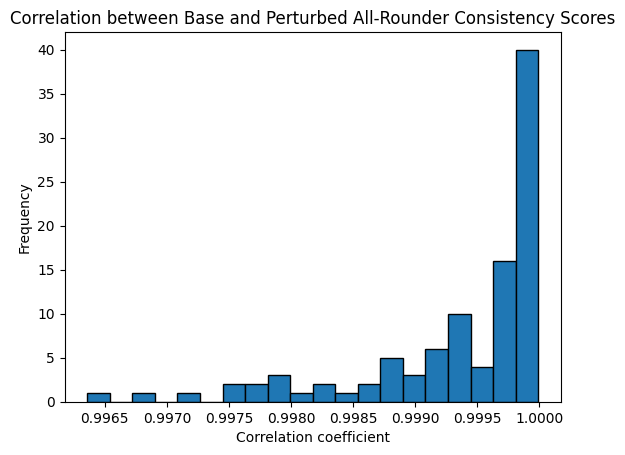

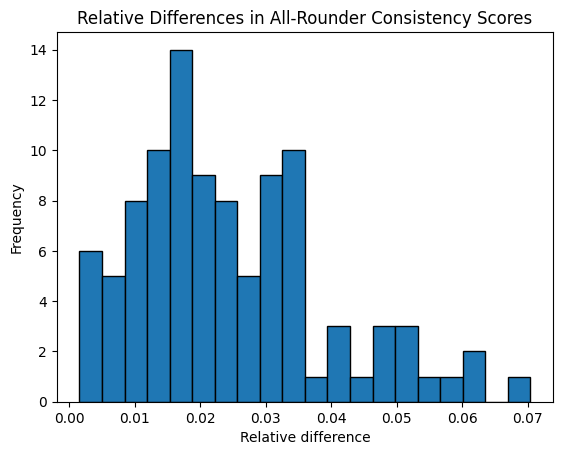

Mean correlation: 0.999898704225298
Mean relative difference: 0.02347470551643408
Mean correlation: 0.999356907294804
Mean relative difference: 0.02462795540174205


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'calculations_with_data' is your DataFrame containing the all-rounder derived metrics
# and 'hybrid_weights_boosted_allrounder' is your final weight Series with the index corresponding to:
# Features for all-rounders
features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Mat',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Mat',
    'Catches_per_Mat'
]

# Define a function to compute the composite consistency score for all-rounders
def compute_consistency_score(df, weights):
    # Ensure the DataFrame columns are in the same order as weights.index
    return np.dot(df[weights.index].values, weights.values)

# Drop rows with missing values in the relevant columns
data_clean = calculations_with_data[hybrid_weights_boosted.index].dropna()

# Recompute base scores using the cleaned data
base_scores = np.dot(data_clean.values, hybrid_weights_boosted.values)
data_clean = calculations_with_data[hybrid_weights_boosted_allrounder.index].dropna()

# Recompute base scores using the cleaned data
base_scores = np.dot(data_clean.values, hybrid_weights_boosted_allrounder.values)


# Set up sensitivity analysis parameters
n_iterations = 100  # Number of perturbation iterations
perturbation_factor = 0.05  # 5% noise
perturbed_scores_list = []

# Generate perturbed weights and compute the corresponding consistency scores
for i in range(n_iterations):
    # Create random noise: normally distributed noise with 0 mean and 5% standard deviation
    noise = np.random.normal(loc=0, scale=perturbation_factor, size=len(hybrid_weights_boosted))
    
    # Apply the noise multiplicatively to each weight
    perturbed_weights = hybrid_weights_boosted * (1 + noise)
    
    # Renormalize to ensure the weights sum to 1
    perturbed_weights = perturbed_weights / perturbed_weights.sum()
    
    # Compute consistency score with perturbed weights
    perturbed_scores = compute_consistency_score(data_clean, perturbed_weights)

    perturbed_scores_list.append(perturbed_scores)

# For each perturbed set, compute the correlation with the base scores
correlations = []
for scores in perturbed_scores_list:
    # Check if the standard deviation of either set is zero to avoid undefined correlations
    if np.std(base_scores) == 0 or np.std(scores) == 0:
         correlations.append(np.nan)
    else:
         correlations.append(np.corrcoef(base_scores, scores)[0, 1])

# Filter out non-finite (NaN or inf) values from the correlations list
valid_correlations = [corr for corr in correlations if np.isfinite(corr)]

# Compute the mean relative difference between perturbed scores and base scores
base_mean_abs = np.mean(np.abs(base_scores))
if base_mean_abs == 0:
    relative_differences = [np.nan for _ in perturbed_scores_list]
else:
    relative_differences = [
        np.mean(np.abs(scores - base_scores)) / base_mean_abs
        for scores in perturbed_scores_list
    ]

# Filter out non-finite values from the relative differences
valid_relative_differences = [rd for rd in relative_differences if np.isfinite(rd)]

# Plot the distribution of correlation coefficients (if there are valid values)
if valid_correlations:
    plt.hist(valid_correlations, bins=20, edgecolor='k')
    plt.title("Correlation between Base and Perturbed All-Rounder Consistency Scores")
    plt.xlabel("Correlation coefficient")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No valid correlation values to plot.")

# Plot the distribution of relative differences (if there are valid values)
if valid_relative_differences:
    plt.hist(valid_relative_differences, bins=20, edgecolor='k')
    plt.title("Relative Differences in All-Rounder Consistency Scores")
    plt.xlabel("Relative difference")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No valid relative differences to plot.")

# Print summary statistics using only the valid values
if valid_correlations:
    print("Mean correlation:", np.mean(valid_correlations))
else:
    print("Mean correlation: No valid correlation values.")

if valid_relative_differences:
    print("Mean relative difference:", np.mean(valid_relative_differences))
else:
    print("Mean relative difference: No valid relative differences.")
    print("Mean relative difference: No valid relative differences.")


# FINAL CONSISTENCY SCORE CALCULATION

### Consistency Score(Batting) = (0.157209 × (Inns_per_Mat_Bat)) + (0.117595 × (NO_per_Inns)) + (0.190595 × (Runs_per_BF)) + (0.168621 × (Ave_Score_Bat)) + (0.136275 × (50s100s_per_Inns)) – (0.040415 × (Zeros_per_Inns))

### Consistency Score (Bowler) = (0.050418 × (Inns_per_Mat_bowl)) + (0.045406 × (Overs_per_Inns)) + (0.014101 × (Wkts_per_Overs)) + (0.016071 × (Ave_Score_Bowl)) + (0.019330 × (Econ_Rate)) + (0.007741 × (SR_per_100)) + (0.015065 × (4W5W_per_Inns)) + (0.017913 × (Mdns_per_Overs))
### Consistency Score(Batting) = (0.125812 * (Inns/Mat)) +(0.092156 * (NO/Inns)) +(0.153718 * (Runs/BF)) +(0.113457 * Ave) +(0.128828 * ((50s + 2 * 100s)/Inns)) -(0.044598 * (Zeros/Inns))

### Consistency Score (Bowler) = 0.086642 * (Inns / Mat) + 0.081796 * (Overs / Mat) + 0.037923 * (Wkts / Overs) + 0.041346 * (Ave) + 0.041517 * (Econ) + 0.013380 * (SR / 100) + 0.033572 * ((4W + 5W) / Mat)

### 0.005254 * (Catches Taken / Mat)

### Consistency Score(allrounder) = Consistency Score(Batting) + Consistency Score(Bowler) + 0.005254 * (Catches Taken / Mat)


In [ ]:
import pandas as pd
import numpy as np

# =============================================================================
# 1. Read Data from Excel for All-Rounders
# =============================================================================
# Update the file path and sheet name as needed.
file_path = '/Users/pavanbandaru/Downloads/cricket-squad-selection/all season cleaned data/allrounderset_ipl.xlsx'
df_allr = pd.read_excel(file_path, sheet_name='Sheet 1')

print("Columns in All-Rounder Data:", df_allr.columns.tolist())

# =============================================================================
# 2. Convert Relevant Columns to Numeric
# =============================================================================
# Batting columns (based on your provided column names)
bat_cols = ['Bat_Mat', 'Bat_Inns', 'NO', 'Bat_Runs', "100's", "50's", 'Zeros', 'Bat_Ave', 'Bat_SR', 'Catches Taken']
for col in bat_cols:
    if col in df_allr.columns:
        df_allr[col] = pd.to_numeric(df_allr[col], errors='coerce')
    else:
        print(f"Warning: Batting column '{col}' not found.")

# Bowling columns
bowl_cols = ['Bowl_Mat', 'Bowl_Inns', 'Overs', 'Wkts', 'Mdns', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W']
for col in bowl_cols:
    if col in df_allr.columns:
        df_allr[col] = pd.to_numeric(df_allr[col], errors='coerce')
    else:
        print(f"Warning: Bowling column '{col}' not found.")

df_allr.fillna(0, inplace=True)

# =============================================================================
# 3. Compute Derived Metrics for Batting and Bowling
# =============================================================================
# --- Batting Derived Metrics ---
df_allr['Inns_per_Mat_Bat'] = df_allr['Bat_Inns'] / df_allr['Bat_Mat']
df_allr['NO_per_Inns'] = df_allr['NO'] 
df_allr['Runs_per_BF'] = df_allr['Bat_Runs']
df_allr["50s100s_per_Inns"] = (df_allr["50's"] + 2 * df_allr["100's"]) 
df_allr['Zeros_per_Inns'] = df_allr['Zeros'] 

# --- Bowling Derived Metrics ---
df_allr['Inns_per_Mat_bowl'] = df_allr['Bowl_Inns'] / df_allr['Bowl_Mat']
df_allr['Overs_per_Mat'] = df_allr['Overs'] 
df_allr['Wkts_per_Overs'] = df_allr['Wkts'] 
df_allr['4W5W_per_Mat'] = (df_allr['4W'] + 1.25 * df_allr['5W']) / df_allr['Bowl_Mat']
# Compute Maidens per Overs (if desired), though not used in weight set:
df_allr['Mdns_per_Overs'] = df_allr['Mdns'] / df_allr['Overs']
df_allr['SR_per_100'] = df_allr['Bowl_SR'] / 100
# For Catches_per_Mat, we'll use 'Catches Taken' divided by Bat_Mat:

# Fill any potential NaNs from divisions
df_allr.fillna(0, inplace=True)

# =============================================================================
# 4. Define Weight Sets for All-Rounders
# =============================================================================
ahp_weights_allrounder = pd.Series({
    'Inns_per_Mat_Bat': 0.20,
    'NO_per_Inns': 0.15,
    'Runs_per_BF': 0.12,
    'Ave_Score_Bat': 0.10,        # Use Bat_Ave
    '50s100s_per_Inns': 0.08,
    'Zeros_per_Inns': 0.07,
    'Inns_per_Mat_bowl': 0.06,
    'Overs_per_Mat': 0.05,
    'Wkts_per_Overs': 0.05,
    'Ave_Score_Bowl': 0.04,       # Use Bowl_Ave
    'Econ_Rate': 0.03,            # Use Econ
    'SR_per_100': 0.02,           
    '4W5W_per_Mat': 0.02,
    'Catches_per_Mat': 0.01
})

pca_weights_allrounder = pd.Series({
    'Inns_per_Mat_Bat': 0.142995,
    'NO_per_Inns': 0.096231,
    'Runs_per_BF': 0.092657,
    'Ave_Score_Bat': 0.040607,
    '50s100s_per_Inns': 0.127650,
    'Zeros_per_Inns': 0.052866,
    'Inns_per_Mat_bowl': 0.142995,
    'Overs_per_Mat': 0.151149,
    'Wkts_per_Overs': 0.004892,
    'Ave_Score_Bowl': 0.040607,
    'Econ_Rate': 0.065484,
    'SR_per_100': 0.018294,
    '4W5W_per_Mat': 0.063305,
    'Catches_per_Mat': 0.001964
})

# Normalize the weight sets
ahp_weights_allrounder /= ahp_weights_allrounder.sum()
pca_weights_allrounder /= pca_weights_allrounder.sum()

# Hybrid weights: 70% AHP, 30% PCA
alpha = 0.7
hybrid_weights_allrounder = alpha * ahp_weights_allrounder + (1 - alpha) * pca_weights_allrounder
hybrid_weights_allrounder /= hybrid_weights_allrounder.sum()

# =============================================================================
# 5. Compute Composite "Consistency" Score for All-Rounders
# =============================================================================
def compute_allrounder_score(row, weights):
    """
    Composite score for all-rounders using:
      Batting:
        Inns_per_Mat_Bat, NO_per_Inns, Runs_per_BF, Bat_Ave, 50s100s_per_Inns, Zeros_per_Inns
      Bowling:
        Inns_per_Mat_bowl, Overs_per_Mat, Wkts_per_Overs, Bowl_Ave, Econ, SR_per_100, 4W5W_per_Mat, Catches_per_Mat
    For metrics where lower values are better (e.g., Zeros, Bowl_Ave, Econ, SR_per_100), we subtract.
    """
    score = 0
    # Batting contributions
    score += row['Inns_per_Mat_Bat'] * weights['Inns_per_Mat_Bat']
    score += row['NO_per_Inns'] * weights['NO_per_Inns']
    score += row['Runs_per_BF'] * weights['Runs_per_BF']
    score += row['Bat_Ave'] * weights['Ave_Score_Bat']      # Higher batting average is better
    score += row["50s100s_per_Inns"] * weights['50s100s_per_Inns']
    score -= row['Zeros_per_Inns'] * weights['Zeros_per_Inns']  # Fewer zeros is better

    # Bowling contributions (lower averages, economy, strike rate are better → subtract)
    score += row['Inns_per_Mat_bowl'] * weights['Inns_per_Mat_bowl']
    score += row['Overs_per_Mat'] * weights['Overs_per_Mat']
    score += row['Wkts_per_Overs'] * weights['Wkts_per_Overs']
    score -= row['Bowl_Ave'] * weights['Ave_Score_Bowl']       # Lower bowling average is better
    score -= row['Econ'] * weights['Econ_Rate']                # Lower economy is better
    score -= row['SR_per_100'] * weights['SR_per_100']         # Lower strike rate is better
    score += row['4W5W_per_Mat'] * weights['4W5W_per_Mat']

    return score

df_allr['Score_AHP'] = df_allr.apply(lambda row: compute_allrounder_score(row, ahp_weights_allrounder), axis=1)
df_allr['Score_PCA'] = df_allr.apply(lambda row: compute_allrounder_score(row, pca_weights_allrounder), axis=1)
df_allr['Score_Hybrid'] = df_allr.apply(lambda row: compute_allrounder_score(row, hybrid_weights_allrounder), axis=1)

df_allr['Rank_AHP'] = df_allr['Score_AHP'].rank(ascending=False, method='min').astype(int)
df_allr['Rank_PCA'] = df_allr['Score_PCA'].rank(ascending=False, method='min').astype(int)
df_allr['Rank_Hybrid'] = df_allr['Score_Hybrid'].rank(ascending=False, method='min').astype(int)

# =============================================================================
# 6. Display the Rankings for All-Rounders
# =============================================================================
cols_to_display = ['Player',
                   'Score_AHP', 'Rank_AHP',
                   'Score_PCA', 'Rank_PCA',
                   'Score_Hybrid', 'Rank_Hybrid']

ranking_output = df_allr[cols_to_display].sort_values(by='Rank_Hybrid')
print("All-Rounder Rankings (AHP-only, PCA-only, and Hybrid weights):")
print(ranking_output.head(10))

# Optionally, save the rankings to an Excel file.
output_file = 'allrounder_rankings.xlsx'
ranking_output.to_excel(output_file, index=False)
print(f"\nRankings saved to '{output_file}'")


Columns in All-Rounder Data: ['Player', 'Span', 'Catches Taken', 'Bat_Mat', 'Bat_Inns', 'NO', 'Bat_Runs', 'HS', 'Bat_Ave', 'BF', 'Bat_SR', "100's", "50's", 'Zeros', '4s', '6s', 'Bowl_Mat', 'Bowl_Inns', 'Overs', 'Mdns', 'Bowl_Runs', 'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W']
All-Rounder Rankings (AHP-only, PCA-only, and Hybrid weights):
        Player  Score_AHP  Rank_AHP   Score_PCA  Rank_PCA  Score_Hybrid  \
36    R Ashwin  47.775392         1  110.090784         1     66.470010   
43   RA Jadeja  45.012075         2   95.635413         2     60.199076   
6     AR Patel  34.905055         3   76.415568         3     47.358209   
18    HV Patel  24.954332         4   52.215485         5     33.132678   
21   KH Pandya  24.383187         6   52.451849         4     32.803785   
5   AD Russell  24.826759         5   43.656228         6     30.475600   
17   HH Pandya  19.565715         7   36.310058         8     24.589018   
12    CV Varun  17.017338         8   37.818806       